# Arrhythmia Dataset

Number of Samples: 109446

Number of Categories: 5

Sampling Frequency: 125Hz

Data Source: Physionet's MIT-BIH Arrhythmia Dataset

Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

-N : Non-ecotic beats (normal beat) -S : Supraventricular ectopic beats -V : Ventricular ectopic beats -F : Fusion Beats -Q : Unknown Beats

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical

In [2]:
train_df = pd.read_csv('mitbih_train.csv', header = None)
test_df = pd.read_csv('mitbih_test.csv', header = None)

In [3]:
df0 = train_df.append(test_df)
df0

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [4]:
df0[187].value_counts()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

In [5]:
df = df0[df0[187] == 0].sample(8000)
df = df.append(df0[df0[187] != 0])
df[187] = df[187].astype(int)
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
58105,0.843177,0.501018,0.144603,0.083503,0.091650,0.075356,0.083503,0.073320,0.087576,0.069246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
38253,0.959108,0.855019,0.416357,0.000000,0.014870,0.033457,0.014870,0.018587,0.007435,0.007435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
33715,1.000000,0.899293,0.694346,0.482332,0.213781,0.040636,0.028269,0.065371,0.090106,0.098940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
70285,0.958738,0.699029,0.114078,0.089806,0.063107,0.019417,0.019417,0.029126,0.002427,0.067961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25389,1.000000,0.846473,0.481328,0.082988,0.020747,0.141079,0.165975,0.228216,0.248963,0.248963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [6]:
df[187].value_counts()

4    8039
0    8000
2    7236
1    2779
3     803
Name: 187, dtype: int64

In [7]:
cl_example = df.groupby(187,group_keys=False).apply(lambda df: df.sample(1))
cl_example

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
3396,1.000000,0.908438,0.351885,0.000000,0.132855,0.242370,0.263914,0.280072,0.283662,0.287253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
18407,0.889447,0.683417,0.060302,0.022613,0.163317,0.218593,0.253769,0.258794,0.271357,0.256281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76200,1.000000,0.942308,0.730769,0.398601,0.222028,0.190559,0.166084,0.146853,0.125874,0.099650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80946,1.000000,0.945241,0.737940,0.462842,0.243807,0.151239,0.126467,0.100391,0.084746,0.070404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86597,0.980198,0.806931,0.717822,0.623762,0.608911,0.710396,0.742574,0.628713,0.502475,0.269802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


#### Normal beat example

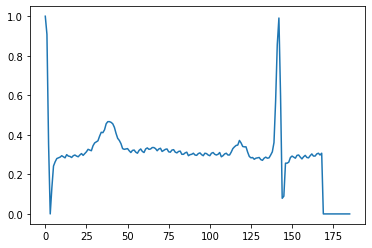

In [8]:
plt.plot(cl_example.iloc[0,:186])

# train_test_split

In [9]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(df.iloc[:, :187], df[187], test_size=0.2, random_state=42)

In [11]:
y_test0.value_counts()

0    1630
4    1592
2    1422
1     561
3     167
Name: 187, dtype: int64

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train0, y_train0, test_size=0.3, random_state=42)

In [13]:
print(X_train)
print(y_train)

            0         1         2         3         4         5         6    \
85299  1.000000  0.500000  0.537671  0.527397  0.523973  0.500000  0.503425   
78111  0.941463  0.936585  0.679675  0.211382  0.000000  0.066667  0.146341   
5196   1.000000  0.874126  0.585664  0.305944  0.085664  0.005245  0.012238   
73397  1.000000  0.722910  0.312694  0.154799  0.061920  0.041796  0.012384   
78217  0.998869  1.000000  0.950226  0.907240  0.920814  0.882353  0.763575   
...         ...       ...       ...       ...       ...       ...       ...   
79209  0.000000  0.071313  0.141005  0.200972  0.294976  0.353323  0.348460   
78210  0.953938  0.888559  0.589896  0.176820  0.000000  0.052006  0.135215   
76375  0.000000  0.019969  0.072197  0.185868  0.327189  0.419355  0.493088   
51812  1.000000  0.891419  0.422067  0.166375  0.210158  0.208406  0.183888   
34687  1.000000  0.912281  0.621554  0.428571  0.335840  0.330827  0.318296   

            7         8         9    ...  177  178 

# data for CNN

In [14]:
X_train = X_train.values
X_test = X_test0.values
X_valid = X_valid.values

In [15]:
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test0), X_test0.shape[1],1)
X_valid = X_valid.reshape(len(X_valid), X_valid.shape[1],1)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(15039, 187, 1)
(5372, 187, 1)
(6446, 187, 1)


In [17]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test0)

In [18]:
y_test

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# CNN

In [19]:
from keras import layers
from keras import models
from keras import optimizers
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint


In [20]:
def conv_network(X_train, y_train, X_valid, y_valid):     
    
    CNN = models.Sequential()
    
    CNN.add(layers.Conv1D(32, (5), activation = 'relu', input_shape = (X_train.shape[1], 1)))
    CNN.add(layers.MaxPool1D(pool_size = (2), strides = (2), padding = "same"))
    
    CNN.add(layers.Conv1D(32, (5), activation = 'relu'))
    CNN.add(layers.MaxPool1D(pool_size = (2), strides = (2), padding = "same"))
    
    CNN.add(layers.Conv1D(32, (5), activation = 'relu'))
    CNN.add(layers.MaxPool1D(pool_size = (2), strides = (2), padding = "same"))
    
    CNN.add(layers.Conv1D(32, (5), activation = 'relu'))
    CNN.add(layers.MaxPool1D(pool_size = (2), strides = (2), padding = "same"))
    
    CNN.add(layers.Flatten())
    CNN.add(layers.Dense(128, activation = 'relu'))
    
    CNN.add(layers.Dense(5, activation = 'softmax'))
    
    sgd = tf.keras.optimizers.SGD(learning_rate = 0.003)
    CNN.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    callback = ModelCheckpoint(filepath = 'weights_CNN.h5', monitor = 'val_loss', save_best_only = True)

    history = CNN.fit(X_train, y_train, epochs = 500, callbacks = [callback], batch_size = 50, validation_data = (X_valid,y_valid))
    
    CNN.summary()
    return(CNN, history)

In [21]:
CNN, history = conv_network(X_train, y_train, X_valid, y_valid)

Epoch 1/500
301/301 [==============================] - 6s 14ms/step - loss: 1.5500 - accuracy: 0.4212 - val_loss: 1.4980 - val_accuracy: 0.4215
Epoch 2/500
301/301 [==============================] - 4s 14ms/step - loss: 1.4427 - accuracy: 0.3625 - val_loss: 1.3998 - val_accuracy: 0.3574
Epoch 3/500
301/301 [==============================] - 4s 13ms/step - loss: 1.3610 - accuracy: 0.4190 - val_loss: 1.3392 - val_accuracy: 0.4862
Epoch 4/500
301/301 [==============================] - 3s 11ms/step - loss: 1.2890 - accuracy: 0.5131 - val_loss: 1.2513 - val_accuracy: 0.5279
Epoch 5/500
301/301 [==============================] - 3s 10ms/step - loss: 1.1717 - accuracy: 0.5484 - val_loss: 1.1277 - val_accuracy: 0.5478
Epoch 6/500
301/301 [==============================] - 3s 10ms/step - loss: 1.0555 - accuracy: 0.5712 - val_loss: 1.0337 - val_accuracy: 0.5639
Epoch 7/500
301/301 [==============================] - 3s 10ms/step - loss: 0.9759 - accuracy: 0.5926 - val_loss: 0.9716 - val_accuracy:

301/301 [==============================] - 3s 10ms/step - loss: 0.2845 - accuracy: 0.9013 - val_loss: 0.3328 - val_accuracy: 0.8874
Epoch 58/500
301/301 [==============================] - 3s 10ms/step - loss: 0.2833 - accuracy: 0.9032 - val_loss: 0.3733 - val_accuracy: 0.8737
Epoch 59/500
301/301 [==============================] - 3s 10ms/step - loss: 0.2820 - accuracy: 0.9046 - val_loss: 0.3310 - val_accuracy: 0.8874
Epoch 60/500
301/301 [==============================] - 3s 9ms/step - loss: 0.2794 - accuracy: 0.9050 - val_loss: 0.3275 - val_accuracy: 0.8900
Epoch 61/500
301/301 [==============================] - 3s 9ms/step - loss: 0.2770 - accuracy: 0.9060 - val_loss: 0.3252 - val_accuracy: 0.8908
Epoch 62/500
301/301 [==============================] - 3s 10ms/step - loss: 0.2721 - accuracy: 0.9076 - val_loss: 0.3339 - val_accuracy: 0.8874
Epoch 63/500
301/301 [==============================] - 3s 10ms/step - loss: 0.2702 - accuracy: 0.9085 - val_loss: 0.3080 - val_accuracy: 0.8968


301/301 [==============================] - 3s 9ms/step - loss: 0.1919 - accuracy: 0.9328 - val_loss: 0.2989 - val_accuracy: 0.9023
Epoch 114/500
301/301 [==============================] - 3s 9ms/step - loss: 0.1917 - accuracy: 0.9342 - val_loss: 0.2612 - val_accuracy: 0.9179
Epoch 115/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1909 - accuracy: 0.9362 - val_loss: 0.2701 - val_accuracy: 0.9111
Epoch 116/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1913 - accuracy: 0.9339 - val_loss: 0.2513 - val_accuracy: 0.9206
Epoch 117/500
301/301 [==============================] - 4s 13ms/step - loss: 0.1885 - accuracy: 0.9368 - val_loss: 0.2604 - val_accuracy: 0.9125
Epoch 118/500
301/301 [==============================] - 4s 12ms/step - loss: 0.1877 - accuracy: 0.9369 - val_loss: 0.2623 - val_accuracy: 0.9165
Epoch 119/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1859 - accuracy: 0.9376 - val_loss: 0.2551 - val_accuracy: 0

301/301 [==============================] - 3s 10ms/step - loss: 0.1423 - accuracy: 0.9511 - val_loss: 0.2580 - val_accuracy: 0.9201
Epoch 170/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1421 - accuracy: 0.9514 - val_loss: 0.2480 - val_accuracy: 0.9237
Epoch 171/500
301/301 [==============================] - 3s 9ms/step - loss: 0.1416 - accuracy: 0.9519 - val_loss: 0.2477 - val_accuracy: 0.9227
Epoch 172/500
301/301 [==============================] - 3s 9ms/step - loss: 0.1428 - accuracy: 0.9510 - val_loss: 0.2401 - val_accuracy: 0.9263
Epoch 173/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1421 - accuracy: 0.9505 - val_loss: 0.2740 - val_accuracy: 0.9158
Epoch 174/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1382 - accuracy: 0.9519 - val_loss: 0.2725 - val_accuracy: 0.9155
Epoch 175/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1393 - accuracy: 0.9525 - val_loss: 0.2746 - val_accuracy: 0

301/301 [==============================] - 3s 10ms/step - loss: 0.1116 - accuracy: 0.9610 - val_loss: 0.2647 - val_accuracy: 0.9271
Epoch 226/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1069 - accuracy: 0.9626 - val_loss: 0.2554 - val_accuracy: 0.9276
Epoch 227/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1062 - accuracy: 0.9642 - val_loss: 0.2621 - val_accuracy: 0.9234
Epoch 228/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1064 - accuracy: 0.9632 - val_loss: 0.2623 - val_accuracy: 0.9269
Epoch 229/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1053 - accuracy: 0.9639 - val_loss: 0.2441 - val_accuracy: 0.9317
Epoch 230/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1032 - accuracy: 0.9644 - val_loss: 0.2645 - val_accuracy: 0.9263
Epoch 231/500
301/301 [==============================] - 3s 10ms/step - loss: 0.1064 - accuracy: 0.9624 - val_loss: 0.2685 - val_accuracy:

301/301 [==============================] - 3s 10ms/step - loss: 0.0818 - accuracy: 0.9705 - val_loss: 0.2680 - val_accuracy: 0.9325
Epoch 282/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0818 - accuracy: 0.9711 - val_loss: 0.2629 - val_accuracy: 0.9333
Epoch 283/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0831 - accuracy: 0.9704 - val_loss: 0.2764 - val_accuracy: 0.9321
Epoch 284/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0811 - accuracy: 0.9711 - val_loss: 0.2762 - val_accuracy: 0.9319
Epoch 285/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0786 - accuracy: 0.9720 - val_loss: 0.2708 - val_accuracy: 0.9305
Epoch 286/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0789 - accuracy: 0.9727 - val_loss: 0.2726 - val_accuracy: 0.9305
Epoch 287/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0773 - accuracy: 0.9723 - val_loss: 0.2797 - val_accuracy:

301/301 [==============================] - 3s 10ms/step - loss: 0.0608 - accuracy: 0.9779 - val_loss: 0.3016 - val_accuracy: 0.9285
Epoch 338/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0587 - accuracy: 0.9789 - val_loss: 0.3013 - val_accuracy: 0.9319
Epoch 339/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0596 - accuracy: 0.9795 - val_loss: 0.2999 - val_accuracy: 0.9283
Epoch 340/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0573 - accuracy: 0.9805 - val_loss: 0.3069 - val_accuracy: 0.9345
Epoch 341/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0580 - accuracy: 0.9791 - val_loss: 0.3137 - val_accuracy: 0.9325
Epoch 342/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0615 - accuracy: 0.9773 - val_loss: 0.3341 - val_accuracy: 0.9300
Epoch 343/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0639 - accuracy: 0.9770 - val_loss: 0.2969 - val_accuracy:

301/301 [==============================] - 3s 10ms/step - loss: 0.0475 - accuracy: 0.9830 - val_loss: 0.4151 - val_accuracy: 0.9176
Epoch 394/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0459 - accuracy: 0.9824 - val_loss: 0.3969 - val_accuracy: 0.9282
Epoch 395/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0483 - accuracy: 0.9822 - val_loss: 0.3547 - val_accuracy: 0.9277
Epoch 396/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0474 - accuracy: 0.9829 - val_loss: 0.3408 - val_accuracy: 0.9352
Epoch 397/500
301/301 [==============================] - 3s 9ms/step - loss: 0.0485 - accuracy: 0.9824 - val_loss: 0.3326 - val_accuracy: 0.9305
Epoch 398/500
301/301 [==============================] - 3s 9ms/step - loss: 0.0423 - accuracy: 0.9854 - val_loss: 0.3593 - val_accuracy: 0.9235
Epoch 399/500
301/301 [==============================] - 3s 9ms/step - loss: 0.0440 - accuracy: 0.9851 - val_loss: 0.3402 - val_accuracy: 0.

301/301 [==============================] - 3s 10ms/step - loss: 0.0352 - accuracy: 0.9875 - val_loss: 0.3737 - val_accuracy: 0.9296
Epoch 450/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0355 - accuracy: 0.9876 - val_loss: 0.4238 - val_accuracy: 0.9260
Epoch 451/500
301/301 [==============================] - 3s 9ms/step - loss: 0.0370 - accuracy: 0.9861 - val_loss: 0.3848 - val_accuracy: 0.9308
Epoch 452/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0326 - accuracy: 0.9888 - val_loss: 0.3706 - val_accuracy: 0.9330
Epoch 453/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0327 - accuracy: 0.9889 - val_loss: 0.3810 - val_accuracy: 0.9341
Epoch 454/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0356 - accuracy: 0.9876 - val_loss: 0.4264 - val_accuracy: 0.9294
Epoch 455/500
301/301 [==============================] - 3s 10ms/step - loss: 0.0399 - accuracy: 0.9858 - val_loss: 0.3748 - val_accuracy: 

In [64]:
#loaded_model.load_weights('weights_CNN.h5')

In [22]:
def evaluate_model(model, history, X_test, y_test):
    scores = model.evaluate((X_test), y_test, verbose = 0) # verbose - выводит шкалу прогресса
    print("Accuracy: %.2f%%" % (scores[1]*100)) # score - список из loss и accuracy
    
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc = 'lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model - Loss')
    plt.legend(['Training', 'Validation'], loc = 'upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    
    target_names=['0','1','2','3','4']
    
    y_true = []
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba = model.predict(X_test)
    prediction = np.argmax(prediction_proba, axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    

In [23]:
def predict_model(model, X):
    prediction_proba = model.predict(X)
    prediction = np.argmax(prediction_proba, axis = 1)
    return prediction

Accuracy: 93.47%


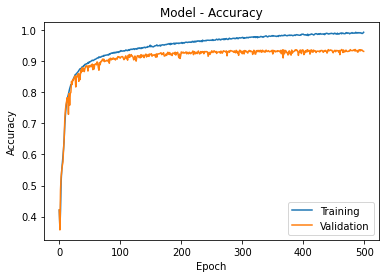

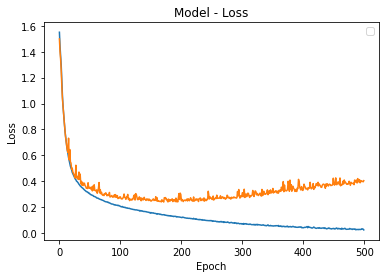

In [24]:
evaluate_model(CNN, history, X_test, y_test)

# Confusion matrix

In [27]:
y_pred = predict_model(CNN, X_test)
print(y_pred)
y_test0

[2 2 4 ... 0 1 4]


77933    2
14737    0
82668    4
66215    0
71811    0
        ..
31322    0
60765    0
15138    0
73046    1
81413    4
Name: 187, Length: 5372, dtype: int32

In [28]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test0, y_pred)
conf_mx

array([[1459,   92,   43,   15,   21],
       [  44,  501,   11,    3,    2],
       [  26,   15, 1357,   12,   12],
       [  15,    2,   18,  132,    0],
       [   7,    5,    8,    0, 1572]], dtype=int64)

In [41]:
from itertools import product

def plot_conf_matrix(cm, target_names): 
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    thresh = cm.max() / 2
    
    plt.figure(figsize=(10, 8))
    plt.imshow(conf_mx, interpolation='nearest', cmap = plt.get_cmap('Blues'))
    
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    tick_marks = np.arange(len(target_names))
    plt.xticks(target_names)
    plt.yticks(tick_marks, target_names)
        
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.colorbar()
    plt.show()

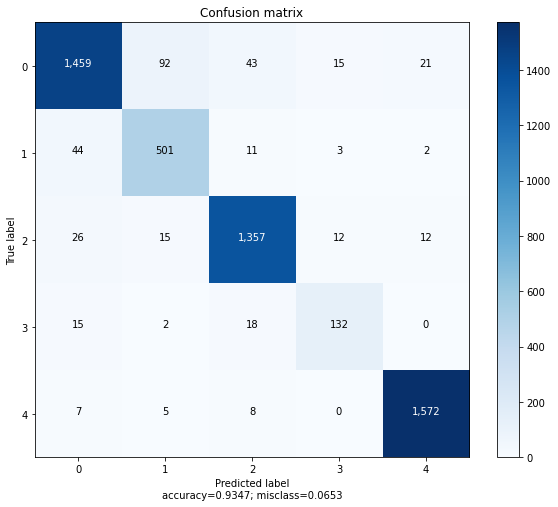

In [42]:
plot_conf_matrix(conf_mx, target_names = range(5))